In [2]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
from obspy import Stream 
%matplotlib inline

In [3]:
taiwan_x=[]
taiwan_y=[]
with open("taiwan.txt","r") as fp:
    res=fp.readlines()
for ii in res:
    tmp = ii.split()
    taiwan_x.append(float(tmp[0]))
    taiwan_y.append(float(tmp[1]))

In [4]:
client1 = Client("IRIS")

In [5]:
print(client1)

FDSN Webservice Client (base url: http://service.iris.edu)
Available Services: 'dataselect' (v1.1.9), 'event' (v1.1.13), 'station' (v1.1.37), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


In [6]:
starttime = UTCDateTime("2016-01-01")
endtime = UTCDateTime("2017-01-01")
cat = client1.get_events(starttime=starttime, endtime=endtime,minlatitude=21, maxlatitude=26, minlongitude=119, maxlongitude=123)
print(cat)

114 Event(s) in Catalog:
2016-12-30T00:30:51.430000Z | +24.798, +122.052 | 4.3 mb
2016-12-19T23:14:17.660000Z | +23.830, +122.437 | 4.3 mb
...
2016-01-03T16:00:09.600000Z | +24.390, +121.910 | 3.9 mb
2016-01-03T14:01:30.280000Z | +24.613, +122.114 | 4.4 mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [7]:
cat.count()

114

In [8]:
mag = []
for i in cat.events:
    mag.append(i.magnitudes[0].mag)

In [9]:
event_lon = []
for i in cat.events:
    lon = i.origins[0].longitude
    event_lon.append(lon)

In [10]:
len(event_lon)

114

In [11]:
event_lat = []
for i in cat.events:
    lat = i.origins[0].latitude
    event_lat.append(lat)

In [12]:
len(event_lat)

114

Text(0.5, 1.0, 'Magnitude distribution')

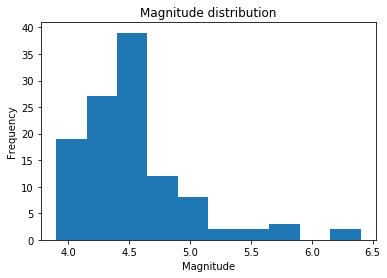

In [13]:
plt.hist(mag)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Magnitude distribution")

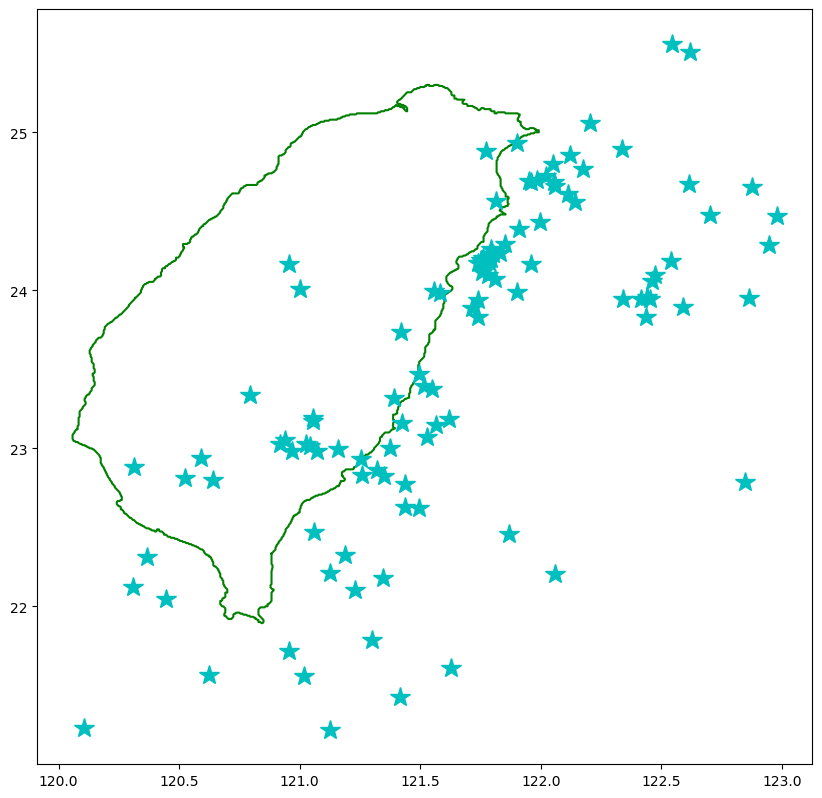

In [14]:
fig = plt.figure(figsize=(10,10), dpi=100) 

plt.plot(taiwan_x,taiwan_y,'g-')
plt.plot(event_lon,event_lat,'c*',markersize=15)

In [15]:
inventory = client1.get_stations(network="TW", station="*",channel="BHZ",starttime=starttime, endtime=endtime, level="response")
print(inventory)

Inventory created at 2019-12-24T12:07:47.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.37
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2016-01-01...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			TW
		Stations (17):
			TW.CHGB (Ching-ging)
			TW.HGSD (Houtzshan)
			TW.KMNB (Kinmen)
			TW.LYUB (Lanyu)
			TW.MATB (Matsu)
			TW.NACB (Ninganchiao)
			TW.PHUB (Penghu)
			TW.RLNB (Erlin)
			TW.SSLB (Suanglung)
			TW.TATO (TAI-PEI)
			TW.TDCB (Techi)
			TW.TPUB (Dapu)
			TW.TWGB (Taitung)
			TW.TWKB (Kenting)
			TW.WFSB (Wufenshan)
			TW.YHNB (Yeheng)
			TW.YULB (Yuli)
		Channels (18):
			TW.CHGB..BHZ, TW.HGSD..BHZ, TW.KMNB..BHZ, TW.LYUB..BHZ, 
			TW.MATB..BHZ, TW.NACB..BHZ, TW.PHUB..BHZ, TW.RLNB..BHZ (2x), 
			TW.SSLB..BHZ, TW.TATO..BHZ, TW.TDCB..BHZ, TW.TPUB..BHZ, 
			TW.TWGB..BHZ, TW.TWKB..BHZ, TW.WFSB..BHZ, TW.YHNB..BHZ, 
			TW.YULB..BHZ


In [16]:
nt = inventory.get_contents()

In [28]:
sta_lon=[]
sta_lat=[]
for i in nt['channels']:
    lat = inventory.get_coordinates( i )["latitude"]
    lon = inventory.get_coordinates( i )["longitude"]
    
    sta_lon.append(lon)
    sta_lat.append(lat)

In [29]:
aa = mag.index(max(mag))
print(aa)

41


In [30]:
o_time = cat[aa].origins[0].time
print(o_time)

2016-05-31T05:23:47.310000Z


In [31]:
main_lon = cat.events[aa].origins[0].longitude
main_lat = cat.events[aa].origins[0].latitude
print(main_lon, main_lat)

122.5458 25.5615


In [32]:
nt['channels']

['TW.CHGB..BHZ',
 'TW.HGSD..BHZ',
 'TW.KMNB..BHZ',
 'TW.LYUB..BHZ',
 'TW.MATB..BHZ',
 'TW.NACB..BHZ',
 'TW.PHUB..BHZ',
 'TW.RLNB..BHZ',
 'TW.RLNB..BHZ',
 'TW.SSLB..BHZ',
 'TW.TATO..BHZ',
 'TW.TDCB..BHZ',
 'TW.TPUB..BHZ',
 'TW.TWGB..BHZ',
 'TW.TWKB..BHZ',
 'TW.WFSB..BHZ',
 'TW.YHNB..BHZ',
 'TW.YULB..BHZ']

In [33]:
st = Stream()
c1=0
for i in nt['channels']:
    sta=i.split('.')[1]
    print(sta)
    try:
        st = st + client1.get_waveforms("TW",sta,"","BHZ",o_time-10,o_time+240,attach_response=True)
        c1 = c1 + 1
        if c1==5:
            break
    except:
        print(sta+" has no data !!!")
        

CHGB
CHGB has no data !!!
HGSD
HGSD has no data !!!
KMNB
LYUB
LYUB has no data !!!
MATB
MATB has no data !!!
NACB
PHUB
PHUB has no data !!!
RLNB
RLNB has no data !!!
RLNB
RLNB has no data !!!
SSLB
TATO
TATO has no data !!!
TDCB
TDCB has no data !!!
TPUB
TWGB


In [34]:
st

5 Trace(s) in Stream:
TW.KMNB..BHZ | 2016-05-31T05:23:37.319500Z - 2016-05-31T05:27:47.269500Z | 20.0 Hz, 5000 samples
TW.NACB..BHZ | 2016-05-31T05:23:37.319500Z - 2016-05-31T05:27:47.269500Z | 20.0 Hz, 5000 samples
TW.SSLB..BHZ | 2016-05-31T05:23:37.319500Z - 2016-05-31T05:27:47.269500Z | 20.0 Hz, 5000 samples
TW.TPUB..BHZ | 2016-05-31T05:23:37.319500Z - 2016-05-31T05:27:47.269500Z | 20.0 Hz, 5000 samples
TW.TWGB..BHZ | 2016-05-31T05:23:37.319500Z - 2016-05-31T05:27:47.269500Z | 20.0 Hz, 5000 samples

In [35]:
sta_lon,sta_lat

([121.174004,
  121.423897,
  118.388199,
  121.5121,
  119.9291,
  121.594704,
  119.580101,
  120.359398,
  120.359398,
  120.954002,
  121.488098,
  121.158302,
  120.629601,
  121.079903,
  120.8125,
  121.781601,
  121.375702,
  121.297096],
 [24.0602,
  23.4921,
  24.4638,
  22.0485,
  26.1402,
  24.1738,
  23.5114,
  23.8911,
  23.8911,
  23.7876,
  24.975401,
  24.252701,
  23.300501,
  22.817699,
  21.940901,
  25.071501,
  24.6695,
  23.3925])

In [36]:
used_sta_lon=[]
used_sta_lat=[]
for i in st:
    lat = inventory.get_coordinates( i.id )["latitude"]
    lon = inventory.get_coordinates( i.id )["longitude"]
    
    used_sta_lon.append(lon)
    used_sta_lat.append(lat)

In [37]:
used_sta_lon,used_sta_lat

([118.388199, 121.594704, 120.954002, 120.629601, 121.079903],
 [24.4638, 24.1738, 23.7876, 23.300501, 22.817699])

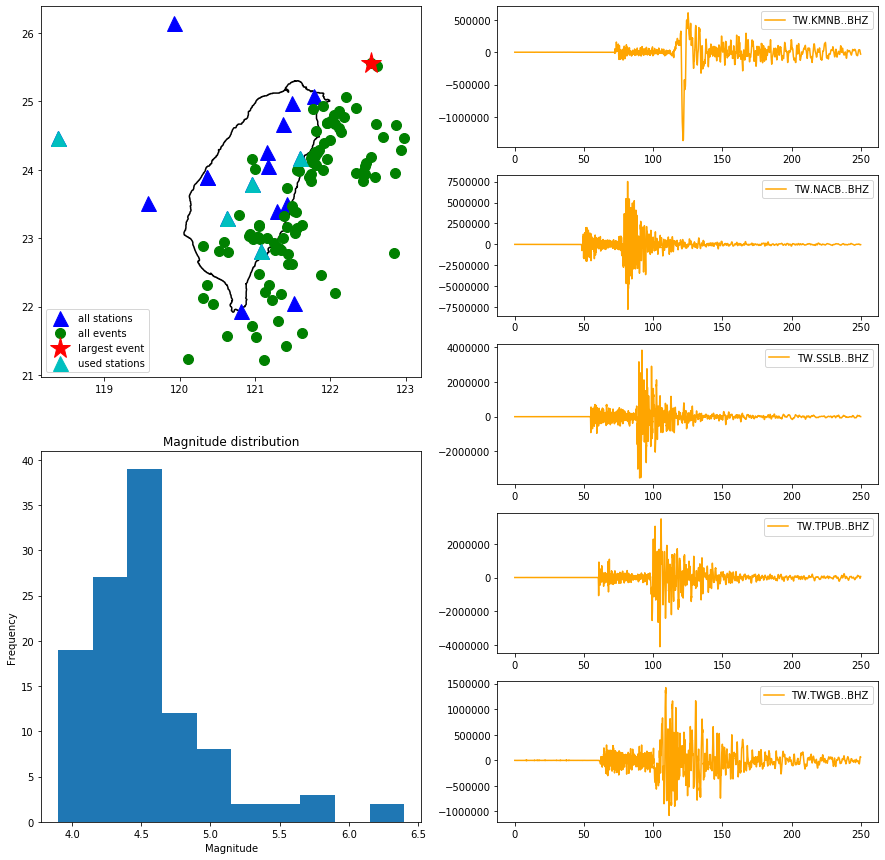

In [39]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.plot(taiwan_x, taiwan_y,"k-")
plt.plot(sta_lon,sta_lat,"b^",markersize=15,label="all stations")
plt.plot(event_lon,event_lat,'go',markersize=10,label="all events")
plt.plot(main_lon, main_lat, "r*", markersize=22, label="largest event")
plt.plot(used_sta_lon, used_sta_lat, "c^", markersize=15, label="used stations")
plt.legend(loc = "lower left")

plt.subplot(2,2,3)
plt.hist(mag)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Magnitude distribution")


num = 2
for i in st:
    ii = i.copy()
    y = ii.data
    x = ii.times() 
    
    plt.subplot(5,2,num)
    plt.plot(x,y, color="orange", label=i.id)
    plt.legend(loc="upper right")
    
    num = num + 2
plt.savefig("1203作業-U10710019-王暄昀.png")